MNIST를 이용한 CV Pipeline 연습 + **Callback** 추가

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.2.0'

In [7]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

### Callback 정의
* 여기서는 `tf.keras.callbacks.Callback`의 `on_epoch_end` 사용
* 나중에 시계열에서는 `tf.keras.callbacks.LearningRateScheduler`를 사용하여 lr 조정

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.98):
            print("enough accuracy so cancelling training")
            self.model.stop_training=True

In [17]:
callbacks = myCallback()

### Load data
```
!pip install tensorflow-datasets
```
* load_data 는 튜플로 묶어서 로드하는 것 주의!

In [8]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 데이터 살펴보기 & Preprocessing
image data에서 들어가야 할 전처리
1. Normalize
2. (ImageDataGenerator를 사용할 경우)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train = X_train/255.
X_test = X_test/255.

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

### Build model
과제에서는 DNN을 사용하지만 Convolutional layer를 이용한 CNN 모델 빌드
* 만약 함수화해서 진행할 경우 epoch랑 accuracy 정보가 필요하니 return값을 `history epoch`랑 `history.history['accuracy'][-1]`을 받아온다.
    * 이 때 accuracy는 마지막 값(가장 최근 정확도)만 가져오기 위해 -1 하는 것임!

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1240 - accuracy: 0.9617
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0411 - accuracy: 0.9875


### Evaluate

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0425 - accuracy: 0.9863


[0.042489826679229736, 0.986299991607666]

In [22]:
pred = model.predict(X_test)

In [26]:
pred[0] # 0번 이미지의 라벨은 7일 확률이 99%

array([1.2932252e-07, 1.4308853e-07, 1.2882946e-04, 7.3704970e-05,
       7.5687375e-08, 3.5350691e-08, 2.3224562e-13, 9.9979562e-01,
       1.3351203e-07, 1.2380819e-06], dtype=float32)

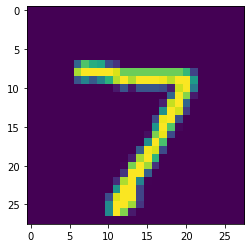

In [24]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])